In [31]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')
input = {-1:np.array([[1,7], [2,8], [3,8]]), 1:np.array([[5,1],[6,-1],[7,3]])}
predict_x = [[0,10], [1,3], [3,4], [3,5], [5,5], [5,6], [6,-5], [5,8]]

In [42]:
class SV_Machine:
    def __init__(self, plotting = True): 
        self.plotting = plotting
        self.colors = {1:'r', -1:'b'}
        if self.plotting:
            self.fig = plt.figure(figsize = (12,12))
            self.ax1 = self.fig.add_subplot(111)
    def train(self, input):
        self.input = input
        # {|w|:[w,b]}
        optimized_values = {}
        converters = [[1,1], [-1,1], [-1,-1], [1,-1]]
        values = []
        for i in self.input:
            for ii in self.input[i]:
                for iii in self.input[i][i]:
                    values.append(iii)
        self.max_value = max(values) 
        self.min_value = min(values)
        values  = None
        steps = [self.max_value * 0.1, self.max_value * 0.01, self.max_value * 0.001]
        b_step_range = 2
        b_step = 5
        w_latest = self.max_value * 10
        optimal_choices = {}
        for step in steps:
            w = np.array([w_latest, w_latest])
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_value*b_step_range), self.max_value*b_step_range, step*b_step):
                    for convert in converters:
                        w_converted = w*convert
                        optimized_value_found = True
                        for i in self.input:
                            for ii in self.input[i]:
                                if not i*(np.dot(ii,w_converted)+b) >= 1:
                                    optimized_value_found = False
                        if optimized_value_found:
                            optimal_choices[np.linalg.norm(w_converted)] = [w_converted,b]
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step')
                else:
                    w = w-step
            optimal_mag = sorted(i for i in optimal_choices)
            optimized_values = optimal_choices[optimal_mag[0]]
            self.w = optimized_values[0]
            self.b = optimized_values[1]
            w_latest = optimized_values[0][0]+step*2
        for i in self.input:
            for ii in self.input[i]:
                print(ii, ':', i*(np.dot(ii,self.w)+self.b))
    
    def predict(self, predict_x):
        classification = np.sign(np.dot(np.array(predict_x), self.w) + self.b)
        if classification != 0 and self.plotting:
            self.ax1.scatter(predict_x[0], predict_x[1], s = 200, marker = '*', c = self.colors[classification])
        return classification
    def visualize(self):
        for i in self.input:
            for ii in self.input[i]:
                self.ax1.scatter(ii[0], ii[1], s = 100, color = self.colors[i])
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]
        drange = (self.min_value*0.9,self.max_value*1.1)
        x_min = drange[0]
        x_max = drange[1]
        psv1 = hyperplane(x_min, self.w, self.b, 1)
        psv2 = hyperplane(x_max, self.w, self.b, 1)
        self.ax1.plot([x_min,x_max], [psv1, psv2], 'k')
        nsv1 = hyperplane(x_min, self.w, self.b, -1)
        nsv2 = hyperplane(x_max, self.w, self.b, -1)
        self.ax1.plot([x_min,x_max], [nsv1, nsv2], 'k')
        dc1 = hyperplane(x_min, self.w, self.b, 0)
        dc2 = hyperplane(x_max, self.w, self.b, 0)
        self.ax1.plot([x_min,x_max], [dc1, dc2], 'y--')
        plt.show()
            
            
                
    

Optimized a step
Optimized a step
Optimized a step
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


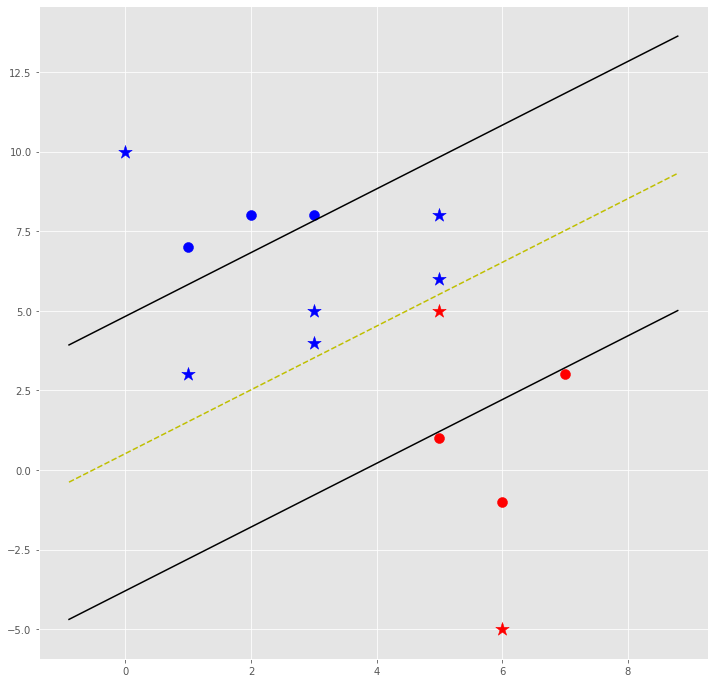

In [43]:
clf = SV_Machine()
clf.train(input = input)
for i in predict_x:
    clf.predict(i)
clf.visualize()

In [34]:
clf.predict([5,2])

1.0